# QUANTUM VORTEX PROJECT
## FUW Hackathon 24-25 March 2018

In [92]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')




### 3 Cele
* Znalezienie wirów
* Śledzenie wirów w czasie
* Wizualacja Fazy od kąta azymutalnego wokół wiru

# 1. Znalezienie wirów 

In [97]:
import numpy as np
import xarray as xr
import holoviews as hv
import matplotlib.pyplot as plt
import blobfinder as bf
import goal_3_funcs

ds = xr.open_dataset("fuw hackathon 2018/data/2017-11-03 mag sequence phase.nc")
hvds = hv.Dataset(ds)
phases = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Phase"])
masks = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Absolute value"])

fields = phases.dimension_values("field", expanded=False)

data = phases[fields[0]].dimension_values("Phase", flat=False)
mask = masks[fields[0]].dimension_values("Absolute value", flat=False)

blobs, vorticity, divergence = bf.findAllBlobs(data,mask)

# Faza funkcji falowej: $\Phi = \textbf{Arg}\Psi$
# Wirowość: $\omega \propto \oint_{C(x,y)} \nabla\Phi \,dl$
 ## gdzie $C(x,y) =  \{\textbf{okrąg o środku w $x$,y i "małym" promieniu}\}$  


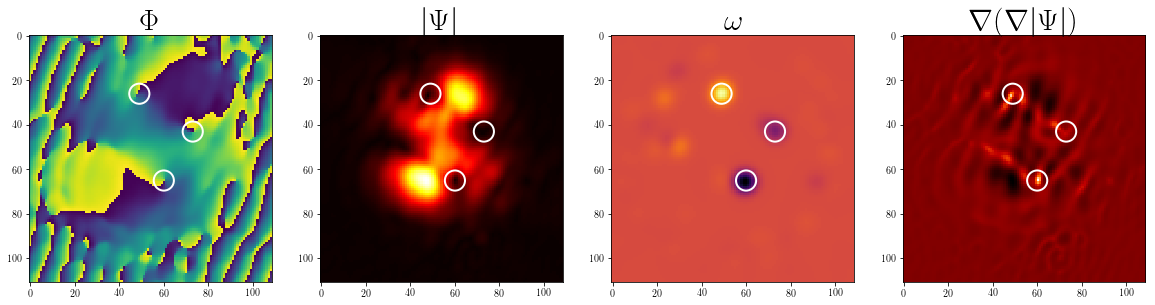

In [101]:
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
fig, pla = plt.subplots(1,4)
fig.set_size_inches(20,10)

pla[0].imshow(data)
pla[0].set_title("$\\Phi$",fontsize=30)
pla[1].imshow(mask,cmap='hot')
pla[2].set_title("$\omega$",fontsize=30)
pla[2].imshow(vorticity, cmap="inferno")
pla[1].set_title("$|\\Psi|$",fontsize=30)
pla[3].imshow(divergence,cmap='gist_heat')
pla[3].set_title("$\\nabla (\\nabla |\\Psi|)$",fontsize=30)
for blob in blobs:
    y, x, r = blob
    for j in range(4):
        pla[j].add_patch(plt.Circle((x, y), r, color='w', linewidth=2, fill=False))
        
        
        

## 

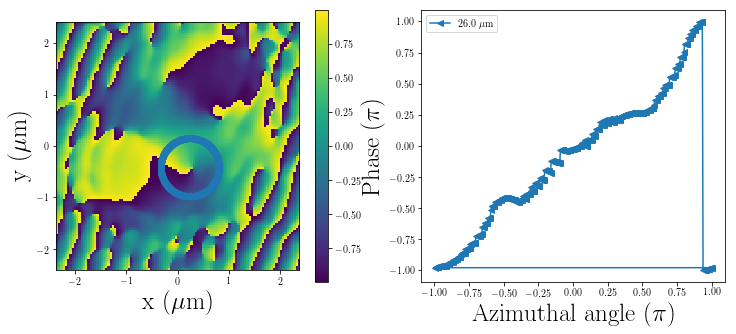

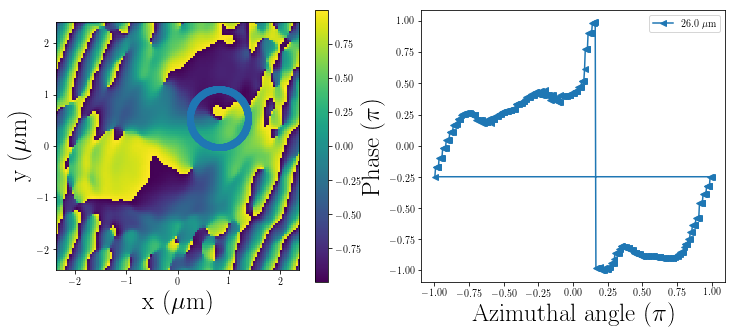

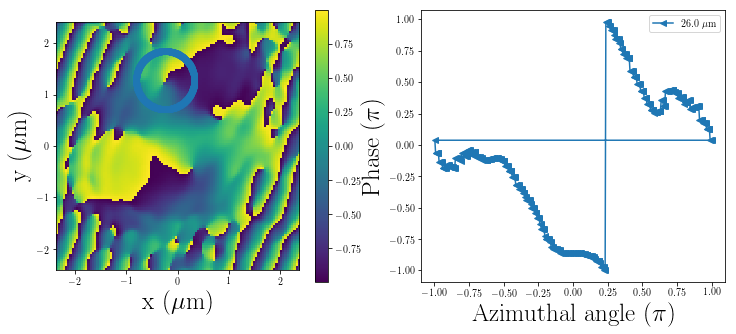

In [96]:
goal_3_funcs.single_frame(data = data, vortex = blobs[0,:2][::-1] ,radii=[blobs[2,0]],savefig=True)
goal_3_funcs.single_frame(data = data, vortex = blobs[1,:2][::-1] ,radii=[blobs[2,0]],savefig=True)
goal_3_funcs.single_frame(data = data, vortex = blobs[2,:2][::-1] ,radii=[blobs[2,0]],savefig=True)